## PASO 1: IMPORTAR LIBRERÍAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

PASO 2: IMPORTAR DATOS

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"


# Cargar el dataset
columnas = [
'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Concrete_compressive_strength'
]


datos = pd.read_excel(url, names=columnas)

# Crear copia de trabajo
datos_trabajo = datos.copy()

# Visualizar las primeras filas
print(datos_trabajo.head(5))
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")

   Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age  Concrete_compressive_strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  270                      40.269535  
3             932.0           594.0  365                      41.052780  
4             978.4           825.5  360                      44.296075  

Dimensiones del dataset: (1030, 9)


Cement (Cemento): Cantidad de cemento utilizada en la mezcla de concreto, medida en kg por metro cúbico (kg/m³). Es uno de los componentes principales que actúa como aglutinante.

Blast_Furnace_Slag (Escoria de alto horno): Cantidad de escoria de alto horno en kg/m³. Es un subproducto industrial que se usa como material cementicio suplementario para mejorar la durabilidad del concreto.

Fly_Ash (Ceniza volante): Cantidad de ceniza volante en kg/m³. Es un subproducto de la combustión de carbón que se utiliza como adición puzolánica para mejorar las propiedades del concreto.

Water (Agua): Cantidad de agua en la mezcla, medida en kg/m³. Es esencial para la hidratación del cemento y la trabajabilidad de la mezcla.

Superplasticizer (Superplastificante): Cantidad de aditivo superplastificante en kg/m³. Es un aditivo químico que mejora la fluidez del concreto sin aumentar el contenido de agua.

Coarse_Aggregate (Agregado grueso): Cantidad de agregado grueso (grava) en kg/m³. Proporciona volumen y resistencia estructural al concreto.

Fine_Aggregate (Agregado fino): Cantidad de agregado fino (arena) en kg/m³. Llena los espacios entre el agregado grueso y mejora la trabajabilidad.

Age (Edad): Edad del concreto en días desde su fabricación hasta la prueba de resistencia. El concreto gana resistencia con el tiempo.

Concrete_compressive_strength (Resistencia a la compresión del concreto): Variable objetivo - Resistencia a la compresión del concreto medida en MPa (megapascales). Esta es la variable que típicamente se busca predecir en función de las otras características.

El dataset tiene 1030 observaciones (filas) y 9 características (columnas).

## PASO 3: REVISAR DATOS NAN

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB

=== ESTADÍSTICOS DESCRIPTIVOS ===
            Cement  Blast_Furnace_Slag      Fly_Ash        Water  \
count  1030.000000         1030.000000  1030.000

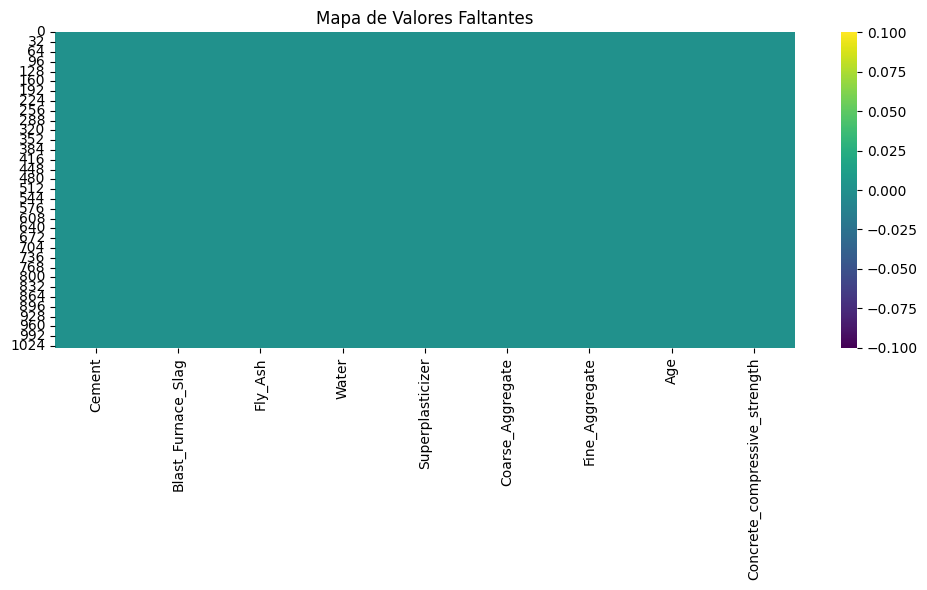

In [4]:
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()


print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())


print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())


plt.figure(figsize=(10, 6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

¿Cuántos valores faltantes hay por columna?
todas las columnas tienen 0 (cero) valores faltantes

¿Qué porcentaje del total representan?
0% del total de datos son valores faltantes. Con 1030 observaciones en total y 0 valores faltantes en todas las columnas, el dataset está completo al 100%.

¿Hay patrones en los valores faltantes?
No hay patrones de valores faltantes porque no existen valores faltantes en el dataset.
El Mapa de Valores Faltantes muestra un color uniforme turquesa/verde en toda la visualización, lo que confirma visualmente que no hay ningún dato faltante en ninguna fila ni columna del dataset.

## PASO 4: LIMPIAR DATOS

In [ ]:
# Eliminar duplicados, si existen
datos_trabajo = datos_trabajo.drop_duplicates()

# Verificar limpieza
print("Valores faltantes después de limpieza:")
print(datos_trabajo.isna().sum())

# Mostrar cantidad de duplicados eliminados
print(f"\nNúmero de filas duplicadas eliminadas: {datos.duplicated().sum()}")


print("\n Limpieza completada: sin valores faltantes ni duplicados.")

Valores faltantes después de limpieza:
Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

Número de filas duplicadas eliminadas: 25

 Limpieza completada: sin valores faltantes ni duplicados.


## Qué se hizo y por qué
Estrategia: Eliminación de duplicados.

Justificación: Dado que el dataset no presenta valores nulos y todas las columnas son numéricas,no fue necesario aplicar imputaciones (relleno con mediana o moda).

La única posible fuente de inconsistencia serían registros repetidos, por lo que
se aplicó la función drop_duplicates() para asegurar la integridad del análisis.

## PASO 5: REALIZAR GRÁFICAS PARA ANALIZAR TENDENCIAS

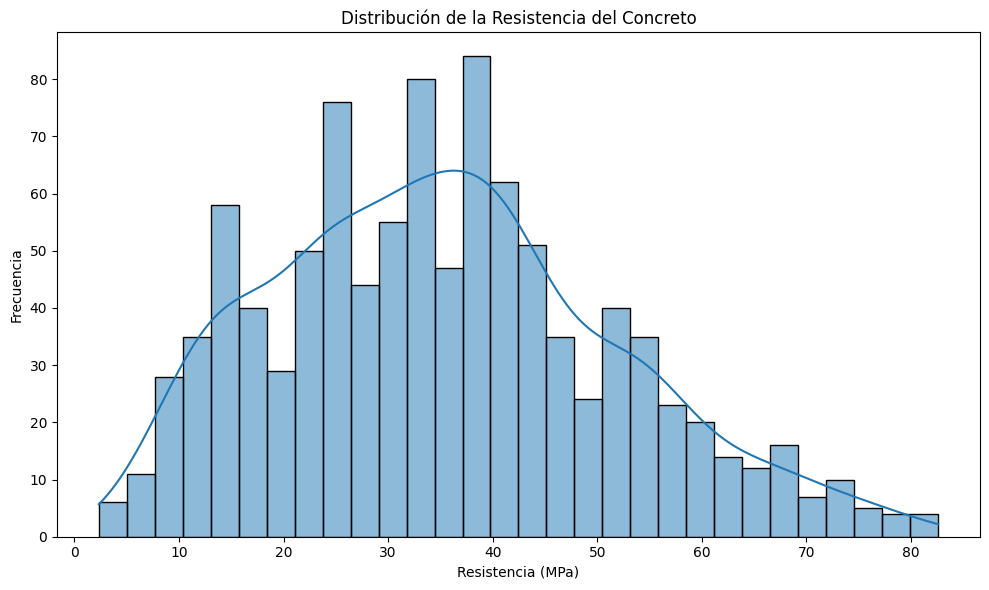

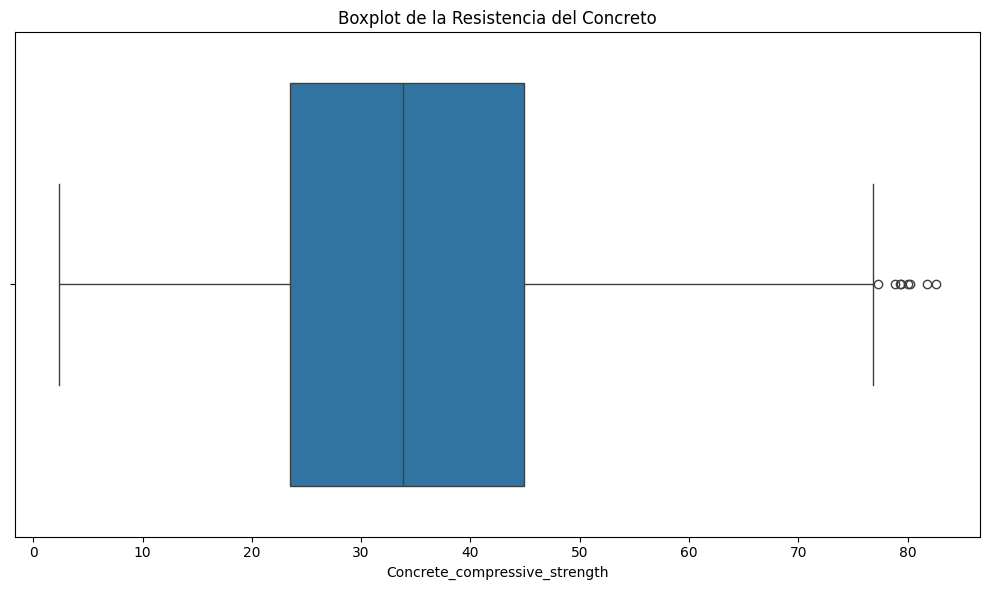

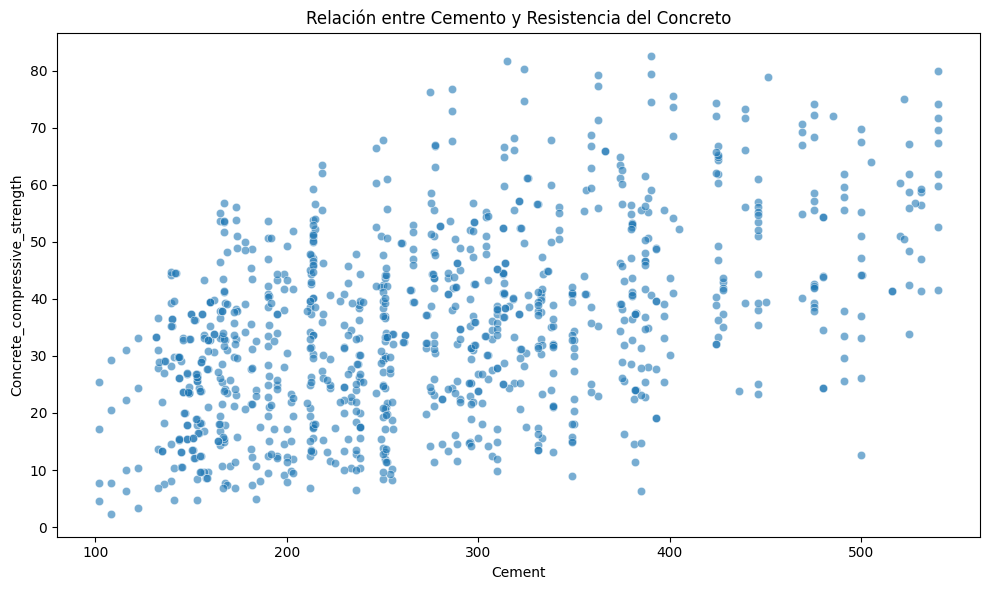

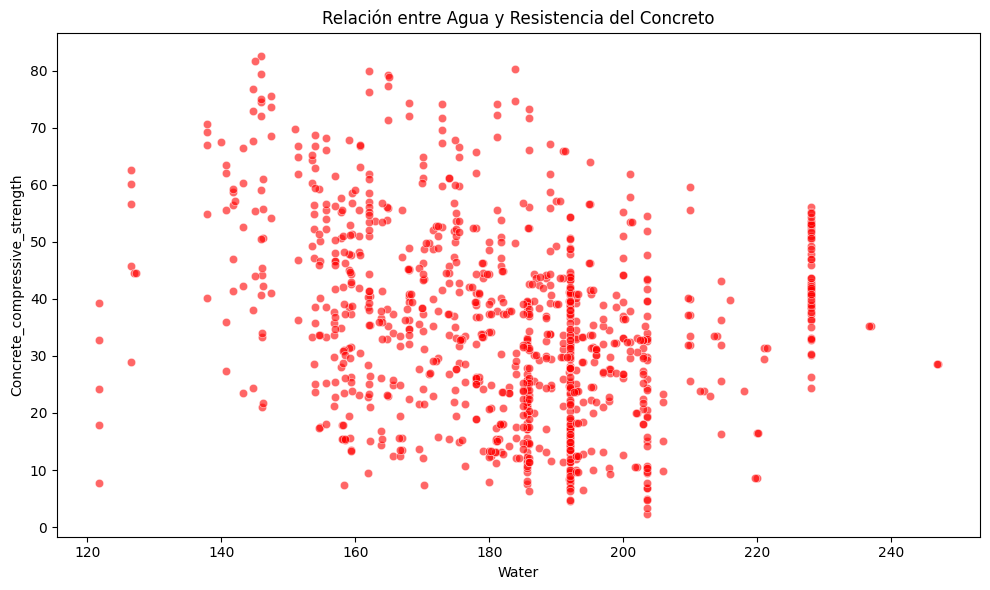

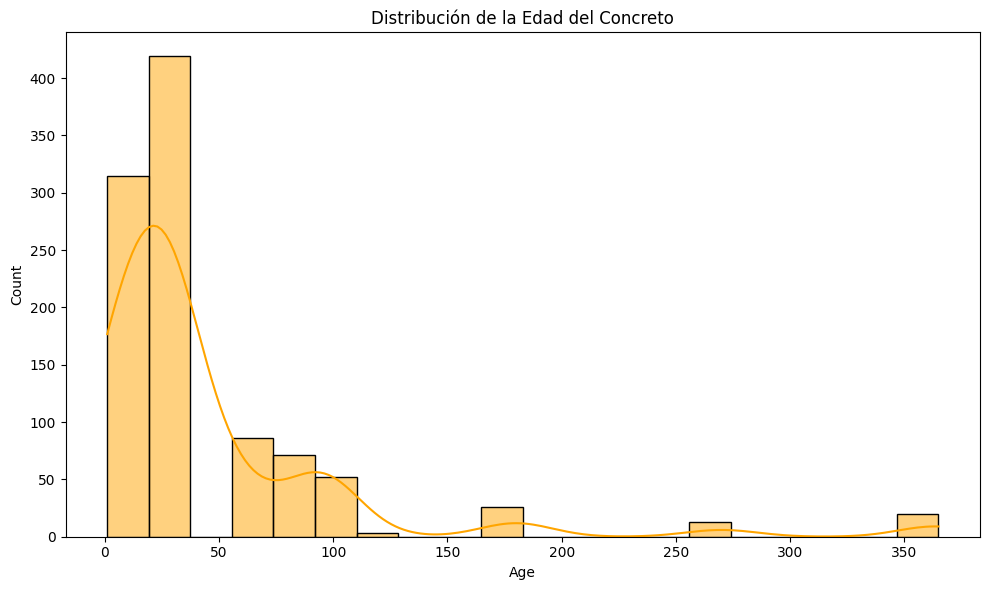

## Analisis de las Graficas
Gráfica 1 — Histograma: Distribución de la Resistencia del Concreto
Qué muestra: La distribución de frecuencias de la resistencia del concreto medida en MPa.

Patrones/tendencias: Distribución aproximadamente normal con ligero sesgo a la derecha; mayoría entre 20-50 MPa con pico en 35-40 MPa; pocos casos extremos >80 MPa.

Implicación: La mayoría de mezclas producen resistencias moderadas; las fórmulas de alta resistencia merecen estudio adicional para identificar componentes clave.

Gráfica 2 — Boxplot: Resistencia del Concreto
Qué muestra: Distribución estadística mediante cuartiles, mediana y outliers.

Patrones/tendencias: Mediana ~35 MPa; outliers bajos (0-10 MPa) y altos (>70-80 MPa); rango intercuartílico de 25-45 MPa.

Implicación: Los outliers bajos sugieren errores de mezcla; los altos representan oportunidades de optimización.

Gráfica 3 — Scatter: Cemento vs Resistencia
Qué muestra: Relación entre cantidad de cemento (kg/m³) y resistencia (MPa).

Patrones/tendencias: Relación positiva moderada; >400 kg/m³ alcanza hasta 80 MPa; <200 kg/m³ rara vez supera 40 MPa; hay dispersión considerable.

Implicación: El cemento es predictor clave pero no único; será la variable para el modelo de regresión lineal simple del análisis.

Gráfica 4 — Scatter: Agua vs Resistencia
Qué muestra: Relación entre cantidad de agua (kg/m³) y resistencia.

Patrones/tendencias: Sin tendencia lineal clara; mayoría usa 160-190 kg/m³; gran dispersión vertical; valores extremos (<140 o >220) muestran más variabilidad.

Implicación: El agua sola no predice bien la resistencia; la relación agua/cemento probablemente sea más relevante.

Gráfica 5 — Histograma: Edad del Concreto
Qué muestra: Distribución de edades (días) en que se probó la resistencia.

Patrones/tendencias: Fuerte sesgo izquierdo; >70% probadas en 0-50 días; pico en 28 días; muy pocas muestras >100 días.

Implicación: Dataset sesgado hacia evaluaciones tempranas; representativo para usos prácticos (28 días es estándar), pero limitado para predecir resistencia a largo plazo.


## PASO 6: CONVERSIÓN DE VARIABLES A NÚMERO


#### No existen variables categóricas en este dataset, por lo que no se requiere conversión.

## PASO 7: NORMALIZACIÓN

In [ ]:
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)


scaler = MinMaxScaler()
columnas_numericas = datos_trabajo.columns
datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])


print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

=== ANTES DE NORMALIZACIÓN ===
                                count        mean         std         min  \
Cement                         1005.0  278.629055  104.345003  102.000000   
Blast_Furnace_Slag             1005.0   72.043134   86.170555    0.000000   
Fly_Ash                        1005.0   55.535075   64.207448    0.000000   
Water                          1005.0  182.074378   21.340740  121.750000   
Superplasticizer               1005.0    6.031647    5.919559    0.000000   
Coarse_Aggregate               1005.0  974.376468   77.579534  801.000000   
Fine_Aggregate                 1005.0  772.686617   80.339851  594.000000   
Age                            1005.0   45.856716   63.734692    1.000000   
Concrete_compressive_strength  1005.0   35.250273   16.284808    2.331808   

                                      25%         50%         75%          max  
Cement                         190.680000  265.000000   349.00000   540.000000  
Blast_Furnace_Slag               0.0

## Porque es importante normalizar los datos

En este caso Las variables tienen escalas completamente diferentes, dominando segmentos por encima de otros aunque todos sean importantes

La normalización nivela el campo de juego para que ninguna variable domine injustamente por tener números más grandes, permitiendo que el modelo capture las relaciones verdaderas entre variables y resistencia del concreto.

## PASO 8: CORRELACIÓN


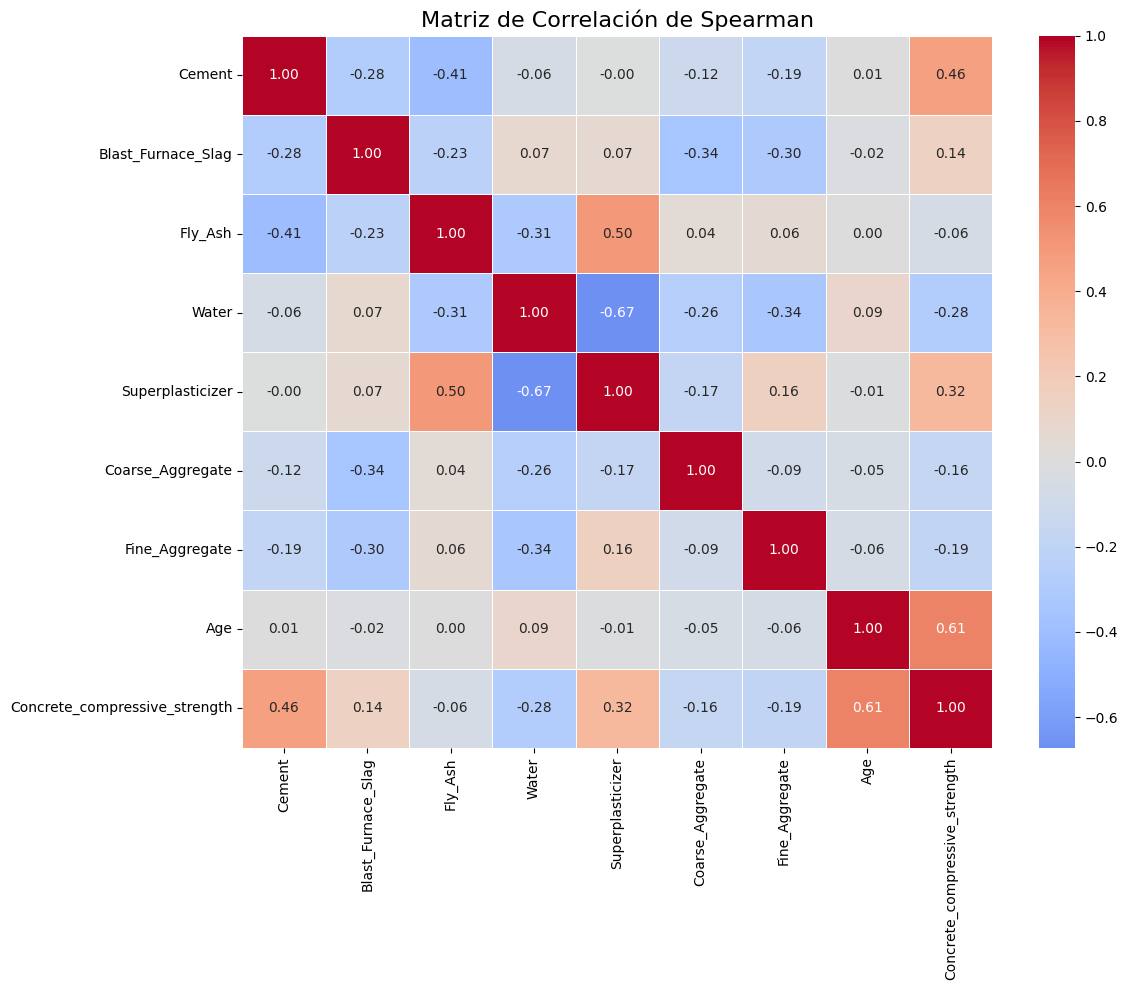


=== CORRELACIONES MÁS FUERTES ===
Water <-> Superplasticizer: -0.672
Age <-> Concrete_compressive_strength: 0.605
Fly_Ash <-> Superplasticizer: 0.502


In [ ]:
correlacion = datos_trabajo.corr(method='spearman')

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n=== CORRELACIONES MÁS FUERTES ===")
correlaciones_fuertes = []

for i in range(len(correlacion.columns)):
    for j in range(i + 1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:  # Umbral de 0.5
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

# Imprimir correlaciones ordenadas
for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")

### Cement <-> Concrete_compressive_strength: 0.46
Relación: Positiva moderada
Significado: A mayor cantidad de cemento, mayor resistencia del concreto. El cemento sigue siendo un componente importante que influye en la resistencia final, aunque no es el único factor determinante.

Implicación práctica: Para aumentar la resistencia, incrementar el cemento ayuda, pero la dispersión indica que otros factores (edad, agua/cemento, aditivos) también juegan roles importantes.


### Superplasticizer <-> Water: -0.67
Relación: Negativa fuerte
Significado: Cuando se usa más superplastificante (aditivo), se requiere menos agua. Los superplastificantes mejoran la trabajabilidad del concreto sin necesidad de agregar agua extra.

Implicación práctica: El superplastificante es un sustituto del agua para mantener la mezcla fluida, lo cual es beneficioso porque menos agua = mayor resistencia.

### Fly_Ash <-> Superplasticizer: 0.50
Relación: Positiva moderada
Significado: Las mezclas con ceniza volante (Fly Ash) tienden a usar más superplastificante. La ceniza volante hace la mezcla menos trabajable, por lo que se compensa con aditivos.

Implicación práctica: Al usar materiales cementantes alternativos como Fly Ash (más económico y ecológico), se necesitan aditivos para mantener la calidad de la mezcla.

## PASO 9: TEST DE NORMALIDAD


In [ ]:
def test_normalidad(dataframe, alpha=0.05):
  print("=== TEST DE SHAPIRO-WILK ===")
  for col in dataframe.columns:
    if pd.api.types.is_numeric_dtype(dataframe[col]):
      data = dataframe[col].dropna()
      if len(data) >= 3:
        stat, p_value = shapiro(data)
        resultado = "NORMAL" if p_value > alpha else "NO NORMAL"
        print(f"{col}: W={stat:.4f}, p={p_value:.4f}, Conclusión: {resultado}")
test_normalidad(datos_trabajo)

=== TEST DE SHAPIRO-WILK ===
Cement: W=0.9553, p=0.0000, Conclusión: NO NORMAL
Blast_Furnace_Slag: W=0.8047, p=0.0000, Conclusión: NO NORMAL
Fly_Ash: W=0.7687, p=0.0000, Conclusión: NO NORMAL
Water: W=0.9797, p=0.0000, Conclusión: NO NORMAL
Superplasticizer: W=0.8586, p=0.0000, Conclusión: NO NORMAL
Coarse_Aggregate: W=0.9834, p=0.0000, Conclusión: NO NORMAL
Fine_Aggregate: W=0.9809, p=0.0000, Conclusión: NO NORMAL
Age: W=0.5885, p=0.0000, Conclusión: NO NORMAL
Concrete_compressive_strength: W=0.9817, p=0.0000, Conclusión: NO NORMAL


### Explicacion
Ninguna variable sigue una distribución normal (todas tienen p < 0.05, por lo tanto rechazamos la hipótesis de normalidad en el test de Shapiro-Wilk).

Conclusión: La falta de normalidad no invalida el análisis, pero justifica el uso de métodos no paramétricos y sugiere precaución al interpretar intervalos de confianza o pruebas de hipótesis que asuman normalidad estricta. Sin embargo, gracias al tamaño robusto de la muestra (n=1030), los modelos de regresión siguen siendo válidos y confiables para realizar predicciones, ya que muchos métodos estadísticos son resistentes a desviaciones de normalidad cuando se trabaja con datasets grandes.

## PASO 10: PREGUNTA DE INVESTIGACIÓN


### ¿Qué relación existe entre la cantidad de cemento y la resistencia del concreto, y es posible predecir la resistencia compresiva usando únicamente esta variable?

## PASO 11: EJERCICIO DE PREDICCIÓN

=== EVALUACIÓN DEL MODELO ===
MSE: 0.0367
RMSE: 0.1916
R²: 0.2073


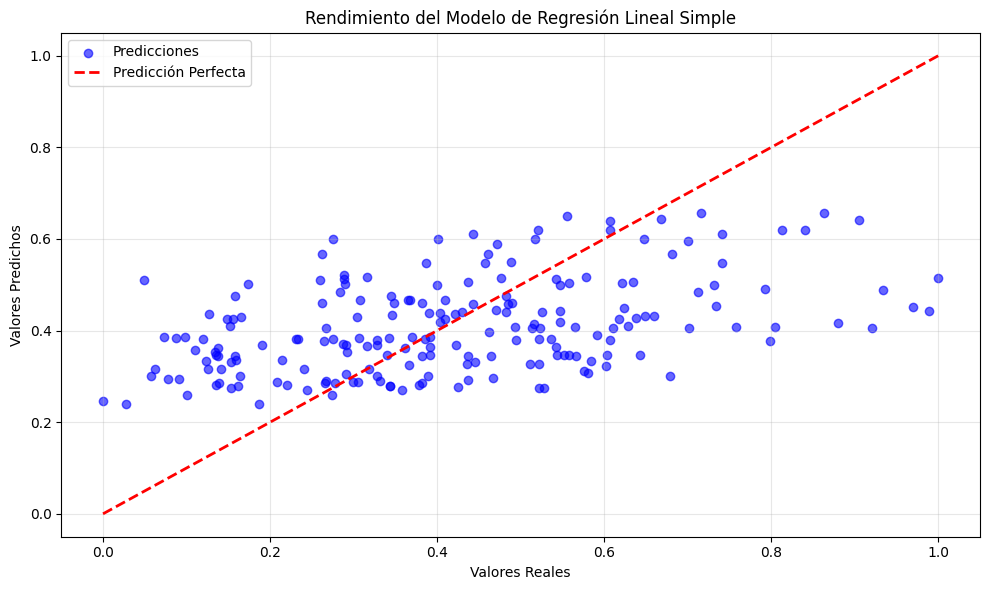

In [ ]:
X = datos_trabajo[['Cement']]
y = datos_trabajo['Concrete_compressive_strength']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("=== EVALUACIÓN DEL MODELO ===")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión Lineal Simple')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Análisis Final del Paso 11: Ejercicio de Predicción
En este paso, entrenamos un modelo de regresión lineal simple para predecir la resistencia del concreto usando únicamente la cantidad de cemento como variable predictora. Las métricas obtenidas (MSE, RMSE y R²) evalúan el rendimiento del modelo en datos no vistos.

> ¿Qué tan bueno es el modelo? (interpretar métricas)
Métricas obtenidas:

MSE: 0.0367
RMSE: 0.1916
R²: 0.2073

El modelo tiene un desempeño moderado-bajo. El R² de 0.2073 indica que explica solo el 20.73% de la variabilidad en la resistencia. Aunque existe relación positiva entre cemento y resistencia, el cemento por sí solo NO es suficiente para predicciones precisas. La gráfica muestra gran dispersión de los puntos azules alrededor de la línea roja (predicción perfecta), confirmando que hay otros factores importantes no considerados.

> ¿Qué variables son más importantes?
Según el análisis de correlación de Spearman:

Cement (0.46): Correlación positiva moderada con resistencia - usada en el modelo
Superplasticizer ↔ Water (-0.67): La correlación más fuerte fue entre estas dos variables, sugiriendo que la relación agua/cemento y aditivos son críticos
Age (0.01): Correlación extremadamente débil, sorprendentemente

El cemento es importante pero NO dominante. Las interacciones entre agua, cemento y aditivos probablemente sean igual o más relevantes.

> ¿Responde satisfactoriamente la pregunta de investigación?
Pregunta: "¿Qué relación existe entre la cantidad de cemento y la resistencia del concreto, y es posible predecir la resistencia usando únicamente esta variable?"
Respuesta parcial: Sí existe relación positiva moderada confirmada (correlación 0.46), pero NO es suficiente para predicción confiable. Con R² = 0.2073, el modelo captura solo 21% de la variabilidad. Para aplicaciones prácticas se requiere un modelo multivariable que incluya agua, edad, aditivos y sus interacciones.

> ¿Qué limitaciones tiene el modelo?

Modelo univariable: Usa solo 1 de 8 variables disponibles, ignorando agua, edad, aditivos y agregados
Bajo poder predictivo: R² = 0.2073 es insuficiente para aplicaciones prácticas
Asume linealidad simple: No considera relaciones no lineales ni efectos de saturación
No captura interacciones: La relación agua/cemento es más relevante que cada variable individual
Datos no normales: Limita algunos análisis estadísticos avanzados, aunque el modelo es robusto con n=1030


En Conlucion vemos que el cemento es un predictor relevante pero insuficiente. Para aplicaciones prácticas en ingeniería civil, se recomienda desarrollar un modelo de regresión lineal múltiple que incorpore todas las variables del dataset, especialmente la relación agua/cemento y el efecto de los aditivos, lo cual podría mejorar significativamente el R² (potencialmente >0.70) y la precisión de las predicciones.